# DS 7331 - Machine Learning - Course Project
Team: Allison Roderick, Jayson Barker, Sandesh Ojha, Brandon Croom
Lab Number: 1

# Business Understanding - 10 pts
<Describe Data Here>

# Data Understanding - 80 pts
<Use Subsections as defined below>

In [70]:
# Import libraries for data analysis
import numpy as np 
import pandas as pd 
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [35]:
# Load data into dataframe
df = pd.read_csv('C:/Users/Jayson/Downloads/us-accidents_team/EDA_Dataset.csv', low_memory=False)

In [36]:
# Check results of dataframe load
df.shape

# view additional data set detail
print (df.dtypes)

# Finding the null values.
print(df.isnull().sum())

ID                    object
Severity             float64
Start_Date            object
Start_Time            object
End_Date              object
End_Time              object
Start_Lat            float64
Start_Lng            float64
Distance(mi)         float64
Side                  object
City                  object
County                object
State                 object
Zipcode              float64
Country               object
AirportCode           object
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
PointofInterest       object
Bump                  object
Crossing              object
Yield                 object
Junction              object
No_Exit               object
Railway               object
Roundabout            object
Station               object
Stop                  object
Traffic_Calming       object
Traffic_Signal

In [37]:
# Dropping: 
# can use zip code and other location identifers - State, County, and Country are clean
# weather_condition explains the weather at the time of accident; wind_speed is heavy in nulls
# source of the data and ID likely not needed
# dropping twilight measures except for sunrise_sunset; all are similar; dropping end time (we have start)
# dropping TMC because while it's informative, 500K nulls
#df = df.drop(['Number', 'Street', 'Start_Lat', 'Start_Lng', 'End_Lng', 'End_Lat', 'Airport_Code', 'End_Lng'
             # , 'Zipcode', 'City'
        # , 'Wind_Chill(F)', 'Precipitation(in)', 'Pressure(in)', 'Humidity(%)', 'Weather_Timestamp'
           # , 'Wind_Speed(mph)', 'Wind_Direction'
        # , 'Source'
        # , 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'End_Time', 'Timezone'
       #  , 'TMC']
#, axis=1)

In [38]:
df.shape

(2261741, 37)

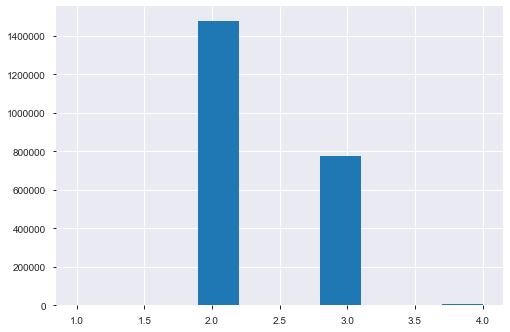

In [39]:
# unique values severity
df['Severity'].hist()

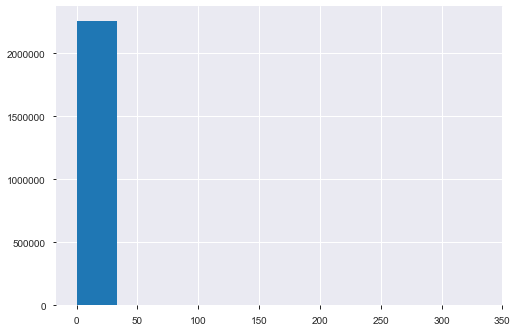

In [40]:
# unique values distance
df['Distance(mi)'].hist()

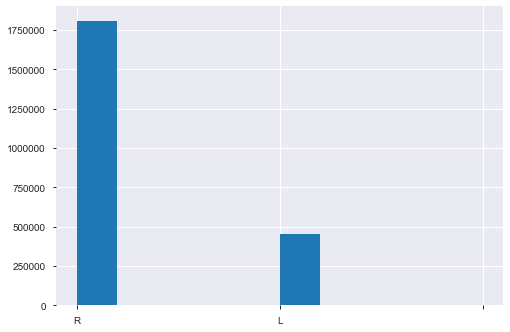

In [41]:
# unique values side
df['Side'].hist()

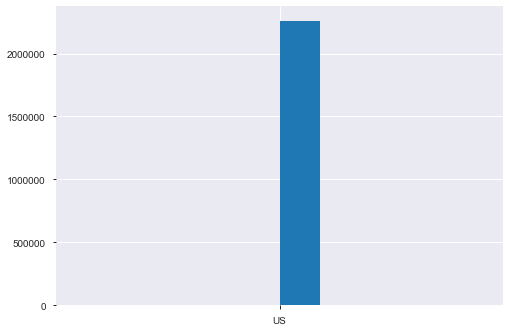

In [42]:
# unique values country
df['Country'].hist()

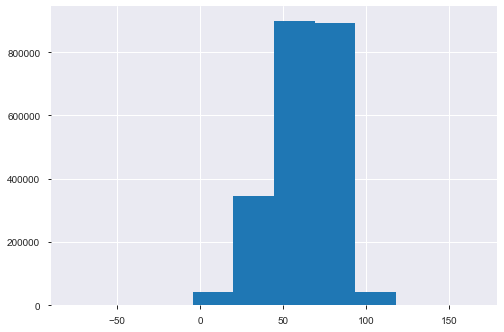

In [43]:
# unique values Temperature(F)
df['Temperature(F)'].hist()

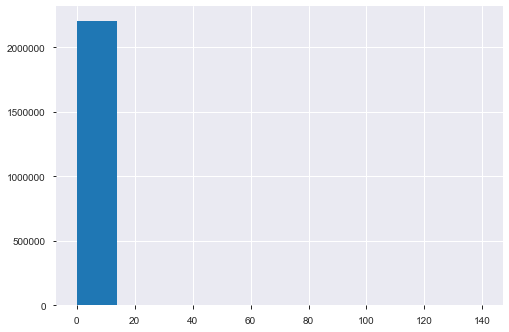

In [44]:
# unique values visibility
df['Visibility(mi)'].hist()

In [46]:
# Finding the null values.
print(df.isnull().sum())

ID                       0
Severity                 2
Start_Date               2
Start_Time               2
End_Date                 2
End_Time                 2
Start_Lat                2
Start_Lng                2
Distance(mi)             2
Side                     3
City                    48
County                   3
State                    3
Zipcode                276
Country                  3
AirportCode           3640
Temperature(F)       38279
Humidity(%)          40615
Pressure(in)         33068
Visibility(mi)       46279
Wind_Speed(mph)          2
Precipitation(in)        2
Weather_Condition    46228
PointofInterest          3
Bump                     3
Crossing                 3
Yield                    3
Junction                 3
No_Exit                  3
Railway                  3
Roundabout               3
Station                  3
Stop                     3
Traffic_Calming          3
Traffic_Signal           3
Turning_Loop             3
Sunrise_Sunset          54
d

In [22]:
# Split dataset into test and train

train = df.sample(frac=0.7,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [46]:
# Check results of test split
test.shape

(673182, 26)

F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


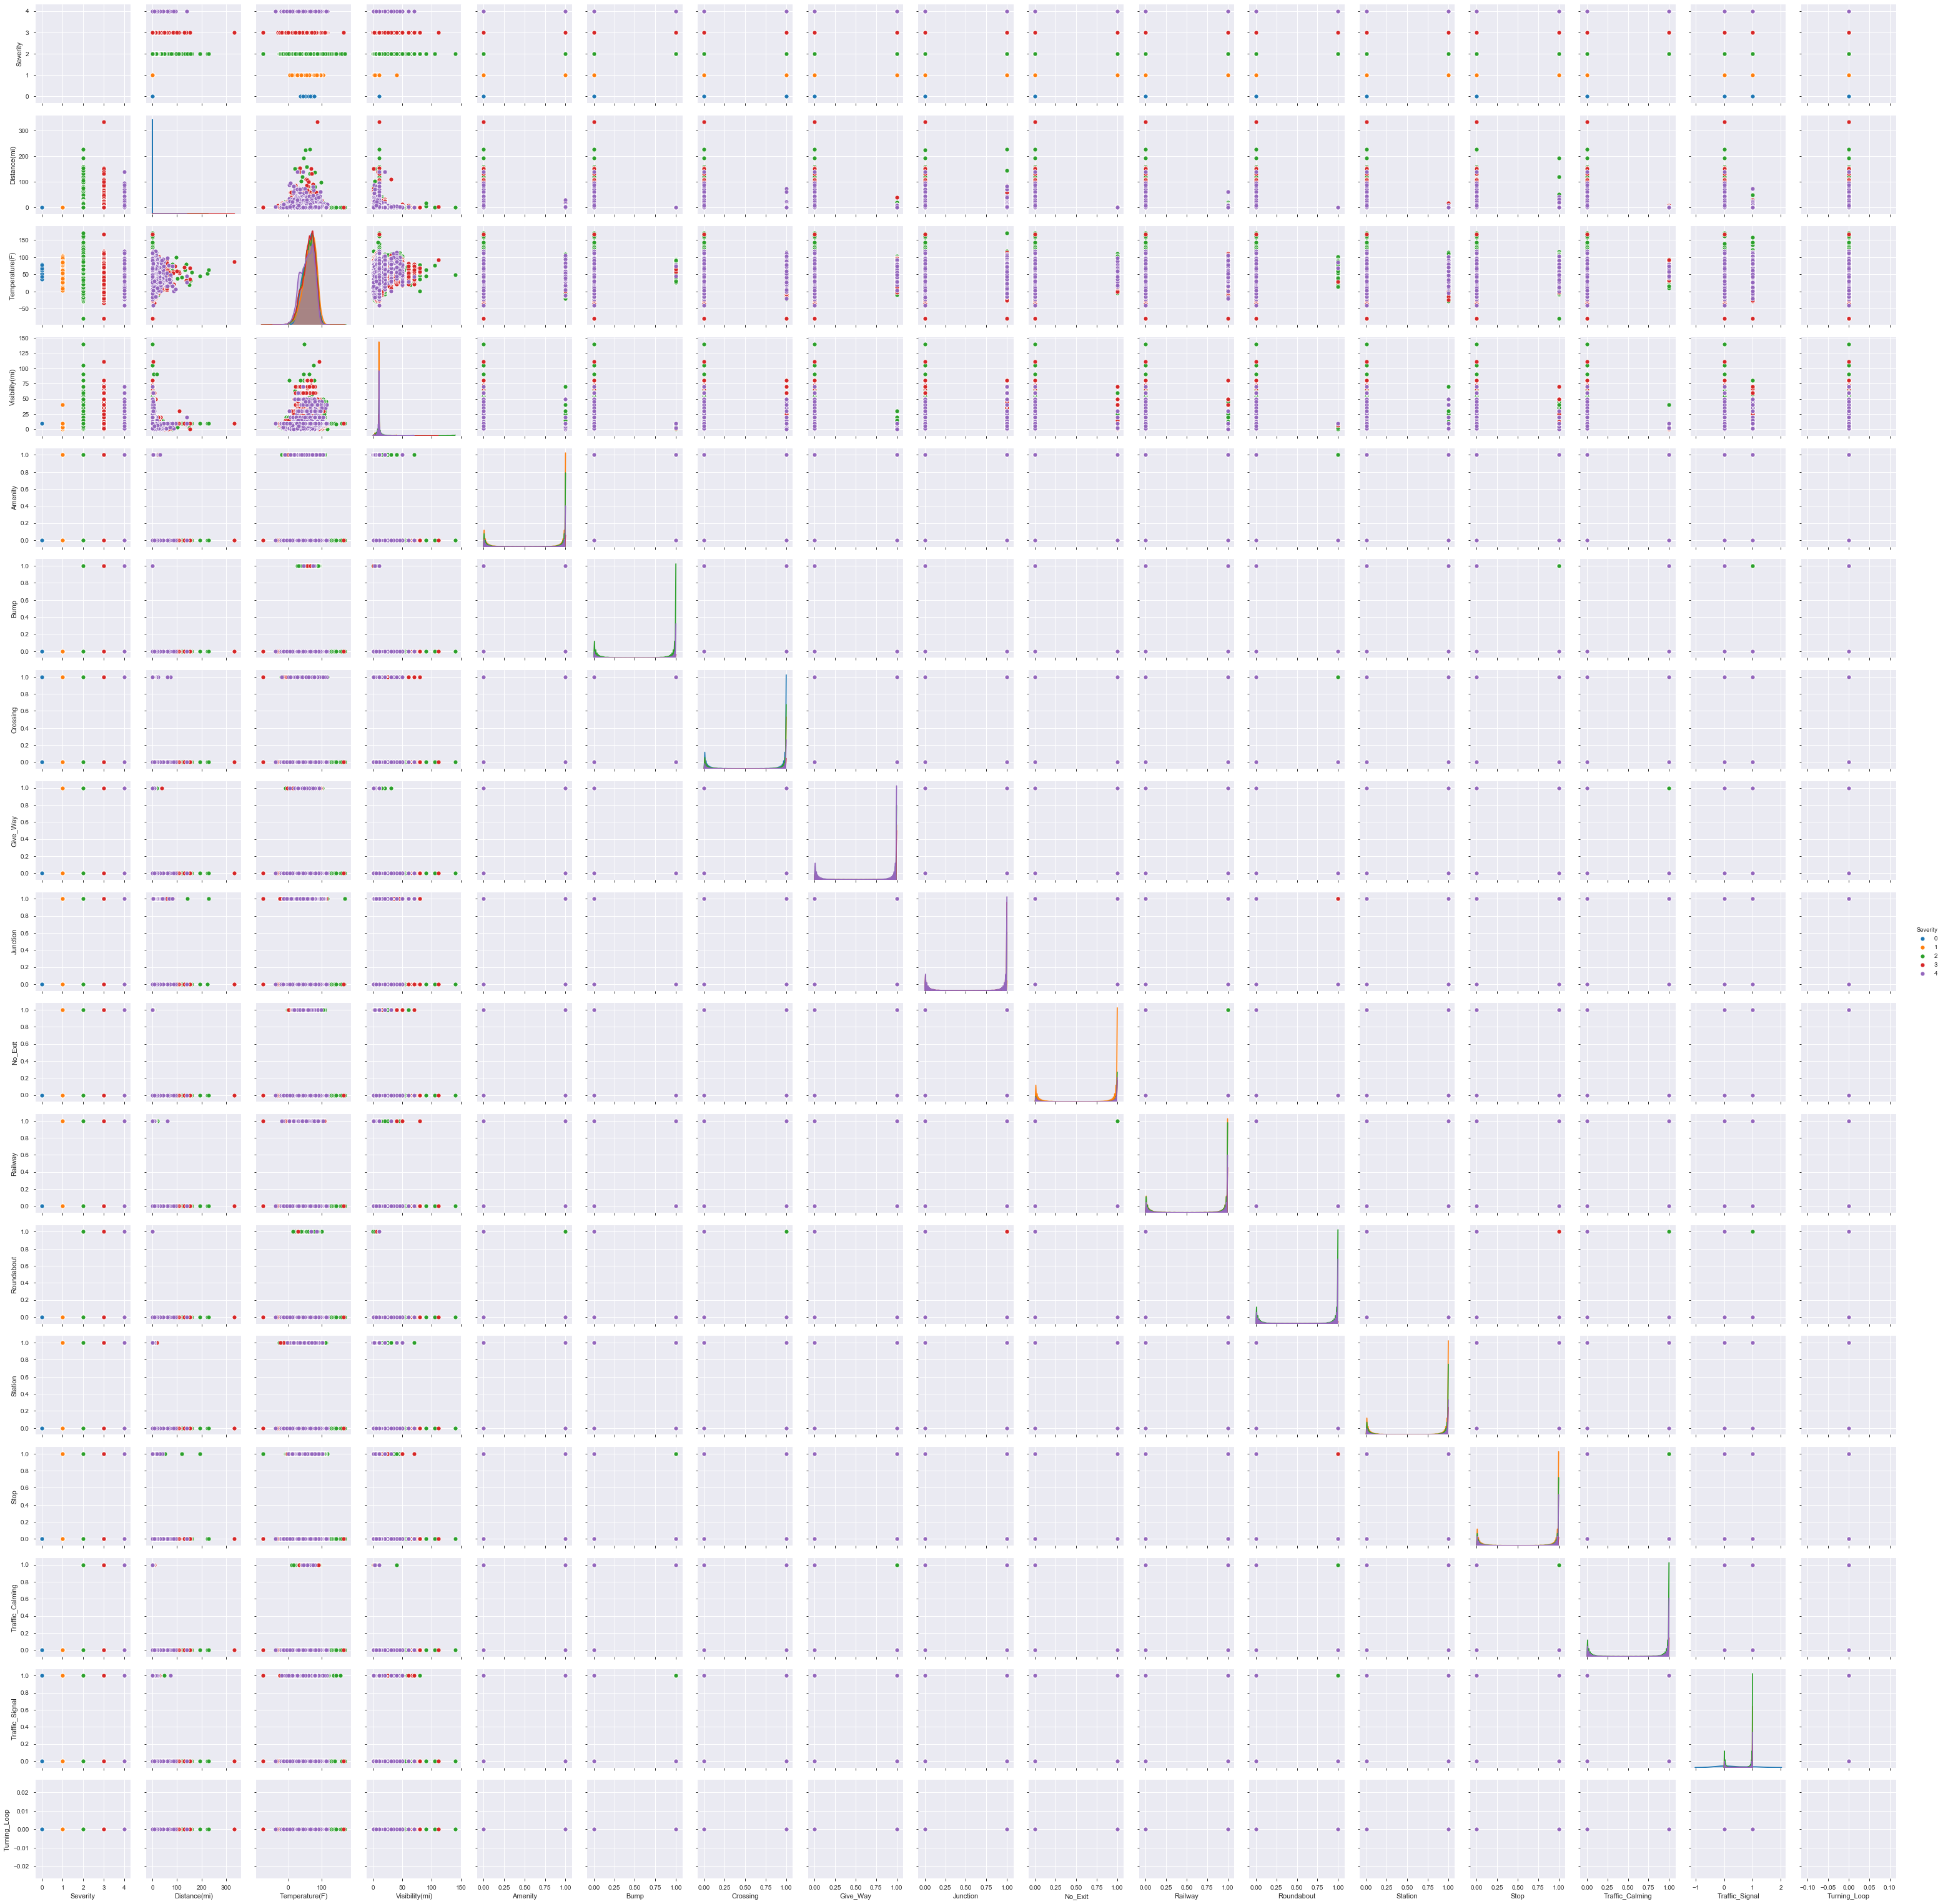

In [23]:
train_2 = train.drop(['Description']
, axis=1)


# distance vs temperature scatterplot
sns.pairplot(train_2, hue="Severity")

In [6]:
# Check results of train split
train.shape

(1570757, 49)

### Distance versus Temperature:

Most of the observed accidents occur when distances are low and temperature is within the range of 0 to 100 degrees Farenheit. It goes without saying that this temperature range is 1) very wide, and 2) encompasses the "normal" range of temperatures within the U.S. 

Interestingly, we do observe a slightly higher incidence of the most severe accidents within the range of 0 to approximately 40 degrees especially across longer distances, possibly attributable to freezing conditions such as ice and/or snow. It will be interesting to correlate this finding alongside our weather description field to see if we observe higher severe accidents when these conditions are present. 

Additionally if we look at the distance axis with the most severe accidents in mind, a pattern starts to emerge that the most severe accidents generally occur under 50 miles distance.

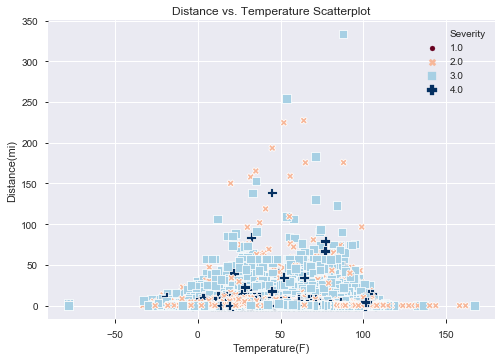

In [80]:
#Scatter plot - Temp Distance

plt.title('Distance vs. Temperature Scatterplot')
sns.scatterplot(x='Temperature(F)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                palette = 'RdBu',
                data=df)

### Distance versus Visibility:

When visibility is lowest, we see larger distances driven and a higher frequency of accidents. It follows that the reduced visibility then may be partly to blame for the higher accident rate we've observed. The severity of these accidents are also a mixed bag - from least severe to most severe.

Conversely, when visibility increases, we see distances decrease. We also see less severe accidents occuring, save for a handful of severity level 3 accidents around the 110 mile mark. Higher visibility then appears to have some correlation with a lower accident rate.

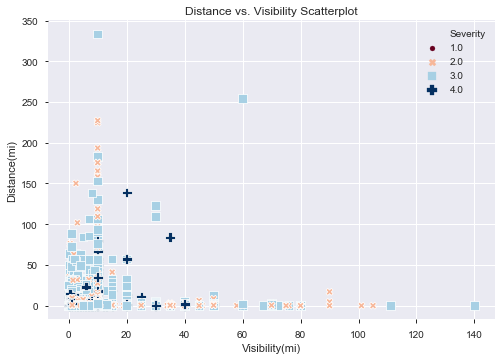

In [81]:
# Scatter plot - Visibility vs. Temperature

plt.title('Distance vs. Visibility Scatterplot')
sns.scatterplot(x='Visibility(mi)', y='Distance(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                palette = 'RdBu',
                data=df)

### Visibility vs. Temperature:

As with our previous observations, most accidents tend to occur when lower visibility conditions are present. As visibility conditions improve, both the accident rate and severity of those accidents appears to also improve. 

If we layer temperature into the plot alongside visibility, there does not appear to be a clear impact temperature has alongside visibility with respect to accident rate or severity.

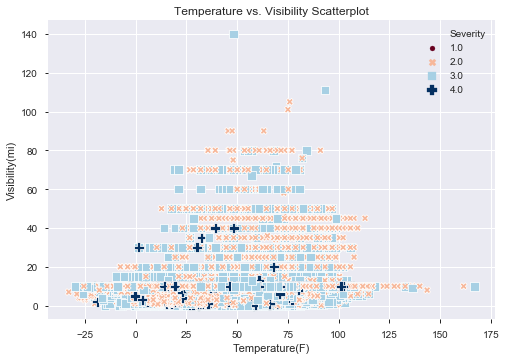

In [82]:
#Scatter plot - Temperature vs. Visibility

plt.title('Temperature vs. Visibility Scatterplot')
sns.scatterplot(x='Temperature(F)', y='Visibility(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                palette = 'RdBu',
                data=df)

###  Precipitation vs. Visibility

Most accidents appear to cluster between 0 and 5 inches of precipitation and lower levels of visibility. 

As we saw in previous scatterplots, as visibility increases, the accident rate tends to decrease. As precipitation increases however, accident frequency also increases but to a point (approximately at 5 inches of precipitation - and again around 10 inches). There appears to be a gap between 5 and 10 inches of precipitation at lower visibility levels. There is also a clustering of accidents right around the 10 inch precipitation mark with lower visibility associated as well. 

As with our previous visibility scatterplot, the most severe accidents appear to occur at lower levels of visibility 

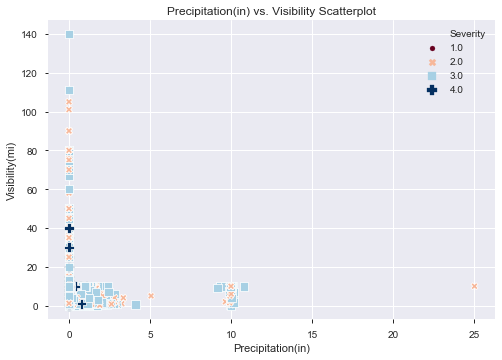

In [84]:
#Scatter plot - Precipitation vs. Visibility

plt.title('Precipitation(in) vs. Visibility Scatterplot')
sns.scatterplot(x='Precipitation(in)', y='Visibility(mi)', 
                hue = 'Severity', 
                style = 'Severity', 
                size = 'Severity',
                palette = 'RdBu',
                data=df)

In [ ]:
# Sev

tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

,TMC,Severity,Distance(mi),Temperature(F),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
TMC,1.000000,0.170315,0.032074,0.000276,-0.000425,0.006835,-0.022244,-0.003217,-0.036879,0.022141,0.031004,-0.001705,-0.009201,-0.001900,-0.011855,-0.017259,-0.001852,-0.057323,NaN
Severity,0.170315,1.000000,0.136822,-0.033450,-0.009543,0.009223,-0.052252,-0.006331,-0.118745,-0.005312,0.062770,-0.004208,-0.022700,-0.004192,-0.043621,-0.046646,-0.007316,-0.197374,NaN
Distance(mi),0.032074,0.136822,1.000000,-0.051803,-0.014238,0.016701,-0.016981,-0.001722,-0.038112,-0.003188,0.039494,-0.003002,-0.011910,-0.001347,-0.020186,-0.008485,-0.002062,-0.068634,NaN
Temperature(F),0.000276,-0.033450,-0.051803,1.000000,0.168717,-0.050278,-0.001635,-0.000217,0.024167,0.000577,-0.004631,0.004673,0.005008,-0.000410,0.010284,-0.005362,-0.001569,0.052522,NaN
Visibility(mi),-0.000425,-0.009543,-0.014238,0.168717,1.000000,0.001902,0.005075,0.000450,0.034027,-0.001211,-0.002983,0.013411,0.002802,0.000257,0.006751,0.001615,0.000424,0.026867,NaN
Wind_Speed(mph),0.006835,0.009223,0.016701,-0.050278,0.001902,1.000000,-0.008604,-0.000465,0.001864,-0.003445,0.009554,-0.000382,-0.005340,-0.001545,-0.001839,0.005106,-0.001652,0.005391,NaN
Amenity,-0.022244,-0.052252,-0.016981,-0.001635,0.005075,-0.008604,1.000000,0.003727,0.110355,0.001028,-0.028012,0.006564,0.038894,0.000286,0.190694,0.025075,0.003727,0.100115,NaN
Bump,-0.003217,-0.006331,-0.001722,-0.000217,0.000450,-0.000465,0.003727,1.000000,0.004771,-0.000474,-0.002803,0.001070,0.000511,-0.000078,0.001762,0.012195,0.621825,-0.002498,NaN
Crossing,-0.036879,-0.118745,-0.038112,0.024167,0.034027,0.001864,0.110355,0.004771,1.000000,0.067749,-0.067727,0.052667,0.274115,-0.000768,0.082567,0.055757,0.010368,0.403208,NaN
Give_Way,0.022141,-0.005312,-0.003188,0.000577,-0.001211,-0.003445,0.001028,-0.000474,0.067749,1.000000,-0.007537,0.044911,-0.001118,-0.000347,0.000057,0.045447,0.004511,0.044548,NaN


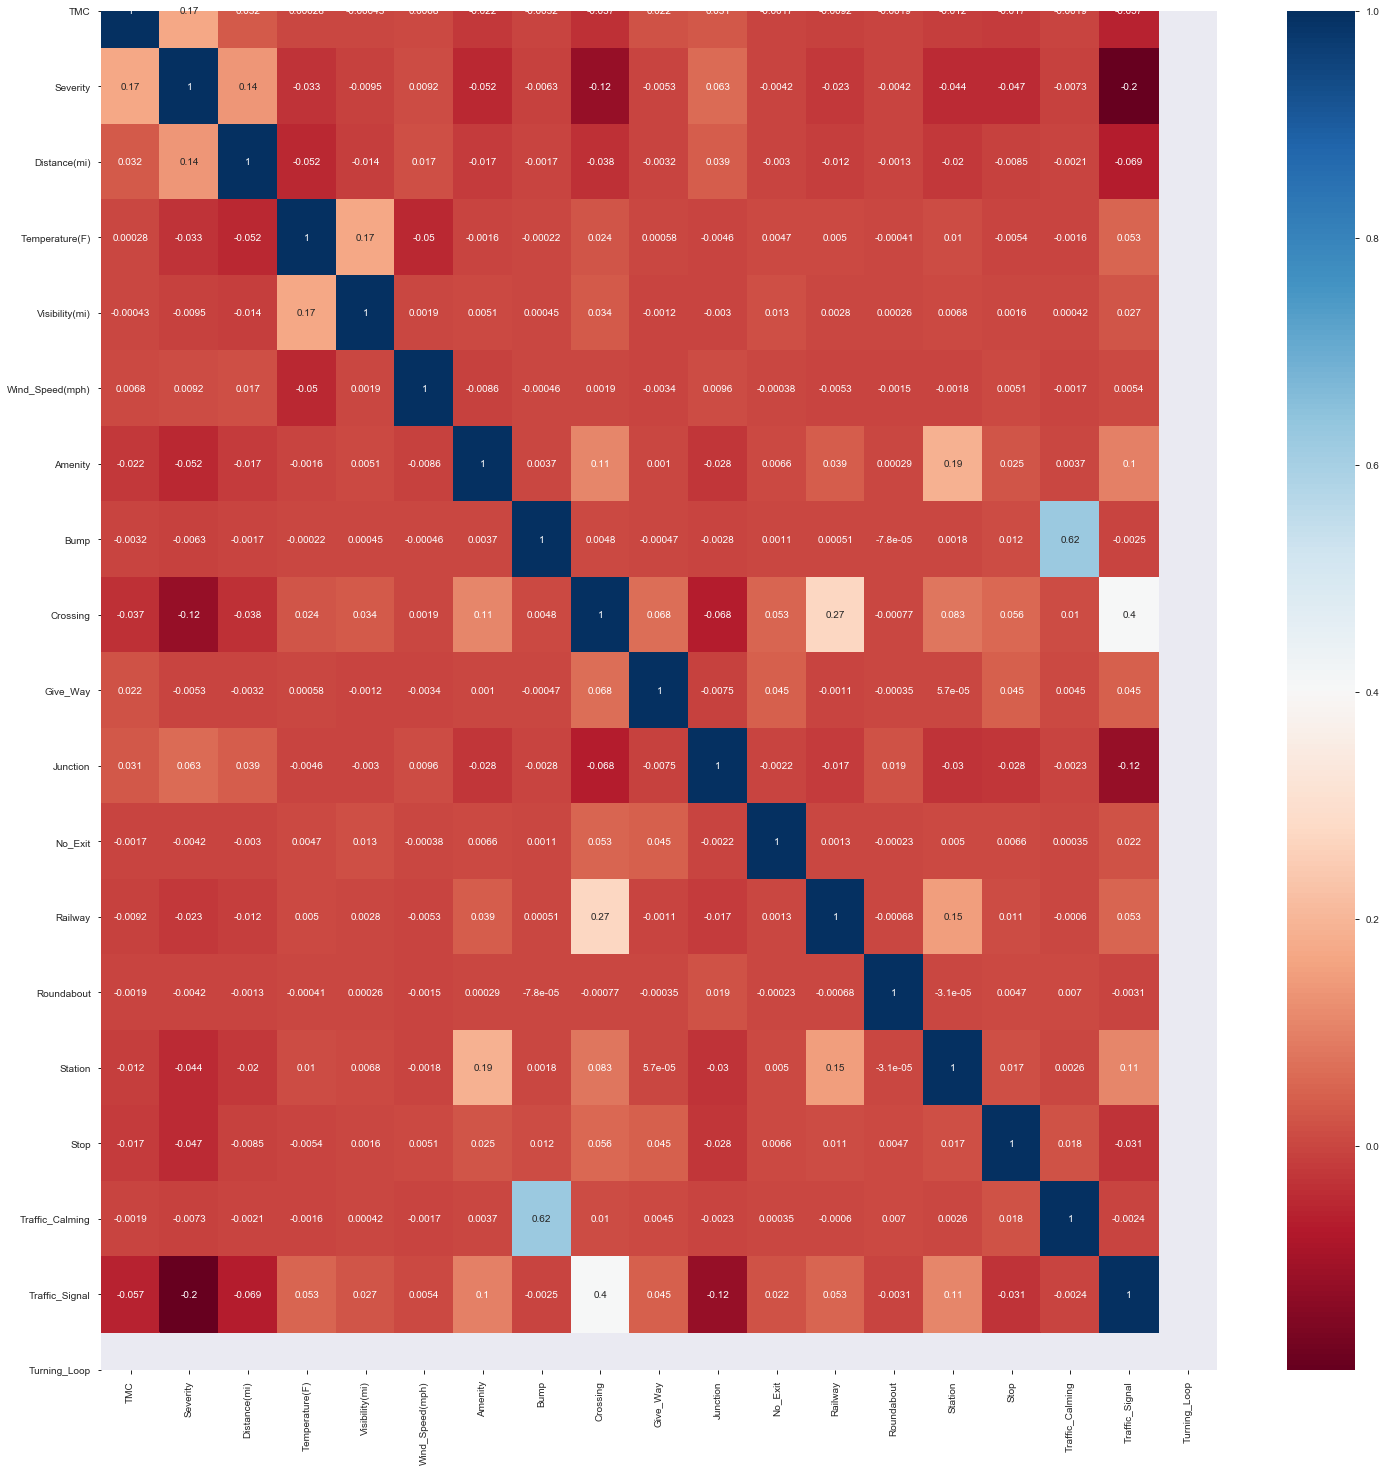

In [52]:
# Severity heatmap
plt.figure(figsize=(25,25))
c= df.corr()
sns.heatmap(c,cmap='RdBu',annot=True)
c

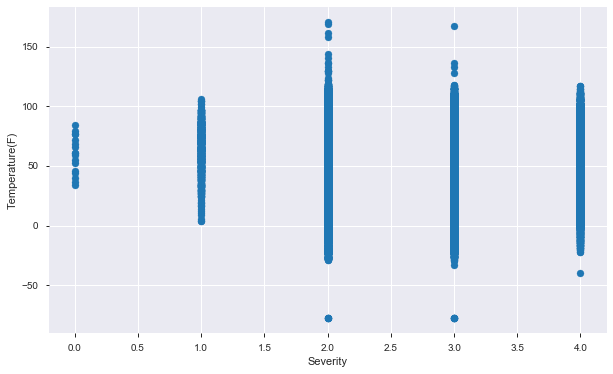

In [36]:
# Severity scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Severity'], df['Temperature(F)'])
ax.set_xlabel('Severity')
ax.set_ylabel('Temperature(F)')
plt.show()

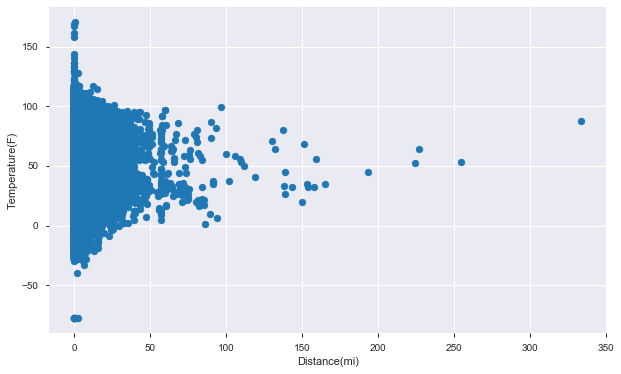

In [42]:
# distance vs temperature scatterplot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Distance(mi)'], df['Temperature(F)'])
ax.set_xlabel('Distance(mi)')
ax.set_ylabel('Temperature(F)')
plt.show()

In [47]:
# distance vs temperature scatterplot
sns.pairplot(train, hue="Severity")

F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
F:\Anaconda\envs\ML7331\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018B15992B88> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# view the data using pandas-profile
# profile = df.profile_report(title = "US Accident Dataset", correlations={
    #"pearson": False,
    #"spearman": False,
    #"kendall": False,
    #"phi_k": False,
    #"cramers": False,
    #"recoded":False,}
#)

profile = pandas_profiling.ProfileReport(df, title='Pandas Profiling Report')
profile.to_file(output_file="your_report2.html")

## Data Meaning - 10 pts

## Data Quality - 15 pts

## Sample Statistics - 10 pts

## Visualizations - 15 pts

## Attribute Relationships - 15 pts

## Relationship Exploration - 10 pts

## Other Features - 5 pts

## Exceptional Work - 10 pts